In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-vs-rabbit/test-images/rabbit/rabbit_test.jpeg
/kaggle/input/cat-vs-rabbit/test-images/rabbit/images.jpeg
/kaggle/input/cat-vs-rabbit/test-images/rabbit/images-4.jpeg
/kaggle/input/cat-vs-rabbit/test-images/rabbit/images-2.jpeg
/kaggle/input/cat-vs-rabbit/test-images/rabbit/images-3.jpeg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.210.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.239.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.234.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.236.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.238.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.208.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.233.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.235.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.237.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.209.jpg
/kaggle/input/cat-vs-rabbit/train-cat-rabbit/rabbit/rabbit.589.jpg
/kaggle/input/cat-vs-rabbit/train-cat-rabbit/rabbit/rabbit.5.jpg
/k

In [2]:
train_data = '/kaggle/input/cat-vs-rabbit/train-cat-rabbit'
val_data = '/kaggle/input/cat-vs-rabbit/val-cat-rabbit'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Buat objek ImageDataGenerator untuk augmentasi data jika diperlukan
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Direktori data latih dan data validasi
train_data = "/kaggle/input/cat-vs-rabbit/train-cat-rabbit"
val_data = "/kaggle/input/cat-vs-rabbit/val-cat-rabbit"

# Buat generator data latih dan data validasi
train_generator = train_datagen.flow_from_directory(
    train_data,  # direktori data latih
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    shuffle=True,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1.0/255)  # Data validasi tidak perlu augmentasi
validation_generator = validation_datagen.flow_from_directory(
    val_data,  # direktori data validasi
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    class_mode='binary')

# Kemudian Anda dapat menggunakan generator ini dalam model Anda

Found 1600 images belonging to 2 classes.
Found 414 images belonging to 2 classes.


In [22]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 128)     

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [25]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= 0.90:
            print("\nValidation accuracy telah mencapai 90% atau lebih, menghentikan pelatihan.")
            self.model.stop_training = True

callbacks = MyCallback()


In [26]:
history = model.fit(
          train_generator,
          steps_per_epoch=32,  # berapa batch yang akan dieksekusi pada setiap epoch
          epochs=50, # tambahkan epochs jika akurasi model belum optimal
          validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
          validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
          verbose=2,
          callbacks=[callbacks])

Epoch 1/50
32/32 - 10s - loss: 3.2904 - accuracy: 0.5352 - val_loss: 1.2455 - val_accuracy: 0.5312 - 10s/epoch - 307ms/step
Epoch 2/50
32/32 - 8s - loss: 0.8790 - accuracy: 0.6670 - val_loss: 0.6731 - val_accuracy: 0.7625 - 8s/epoch - 251ms/step
Epoch 3/50
32/32 - 7s - loss: 0.6352 - accuracy: 0.7266 - val_loss: 0.5997 - val_accuracy: 0.7937 - 7s/epoch - 220ms/step
Epoch 4/50
32/32 - 7s - loss: 0.5691 - accuracy: 0.7529 - val_loss: 0.6008 - val_accuracy: 0.7812 - 7s/epoch - 228ms/step
Epoch 5/50
32/32 - 7s - loss: 0.5740 - accuracy: 0.7920 - val_loss: 0.5754 - val_accuracy: 0.8125 - 7s/epoch - 232ms/step
Epoch 6/50
32/32 - 8s - loss: 0.5272 - accuracy: 0.7891 - val_loss: 0.5553 - val_accuracy: 0.7875 - 8s/epoch - 242ms/step
Epoch 7/50
32/32 - 7s - loss: 0.5715 - accuracy: 0.7656 - val_loss: 0.6427 - val_accuracy: 0.6812 - 7s/epoch - 220ms/step
Epoch 8/50
32/32 - 7s - loss: 0.5522 - accuracy: 0.7734 - val_loss: 0.5650 - val_accuracy: 0.7688 - 7s/epoch - 213ms/step
Epoch 9/50
32/32 - 7s 

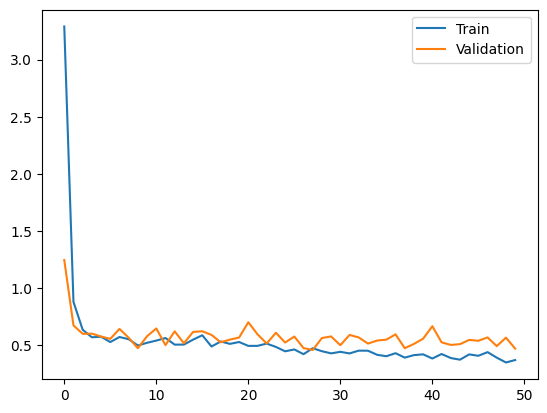

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()

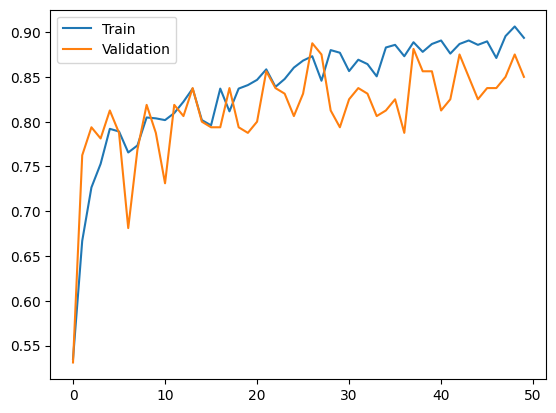

In [28]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()